In [331]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style()
plt.style.use("fivethirtyeight")

In [333]:
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [334]:
# Check for null values
data_null = pd.DataFrame(df.isnull().sum(),columns=['Number of null'])
data_null['percentage'] = (df.isnull().sum()) / len(df)*100
data_null

,Number of null,percentage
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


In [335]:
# Check for duplicate data
df.duplicated().sum()

0

<AxesSubplot:xlabel='EducationField', ylabel='count'>

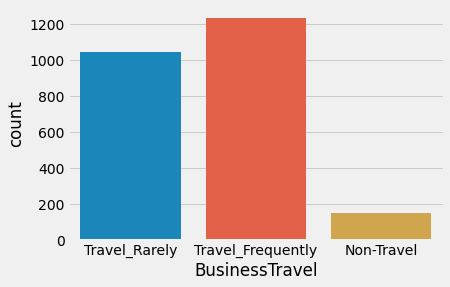

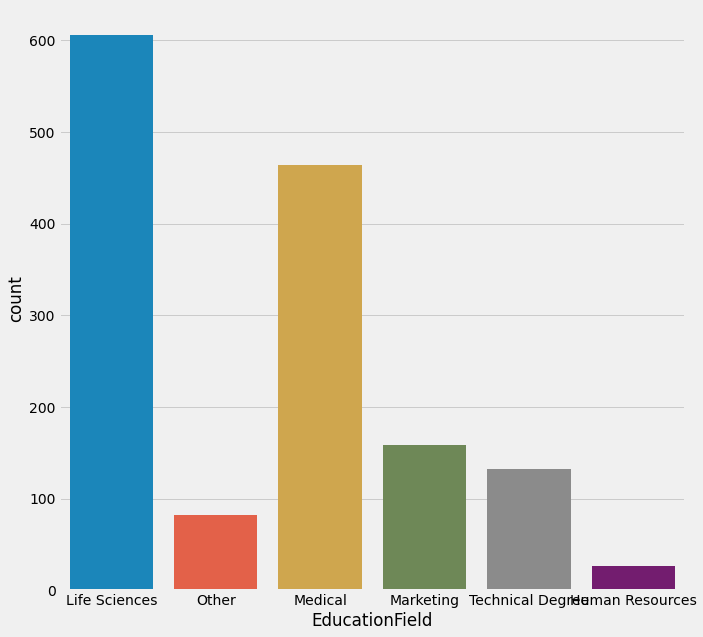

In [336]:
# Check distributions
sns.countplot(x='Attrition', data=df)
sns.countplot(x='BusinessTravel',data=df)
# plt.figure(figsize=(10,5))
# sns.countplot(x='Age',data=df)
plt.figure(figsize=(10,10))
sns.countplot(x='EducationField',data=df)

In [337]:
# Converting string data into integer values.
attrition = {'Yes': 1, 'No': 0}
df.Attrition = [attrition[val] for val in df.Attrition]

bt = { 'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
df.BusinessTravel = [bt[val] for val in df.BusinessTravel]

dpt = {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}
df.Department = [dpt[val] for val in df.Department]

ef = {'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5}
df.EducationField = [ef[val] for val in df.EducationField]

gender = {'Female': 0, 'Male': 1}
df.Gender = [gender[val] for val in df.Gender]

ot = {'Yes': 0, 'No': 1}
df.OverTime = [ot[val] for val in df.OverTime]

ms = {'Single': 0, 'Married': 1, 'Divorced': 2}
df.MaritalStatus = [ms[val] for val in df.MaritalStatus]

jr= {'Sales Executive': 0,
     'Research Scientist': 1,
     'Laboratory Technician': 2,
     'Manufacturing Director': 3,
     'Healthcare Representative': 4,
     'Manager': 5,
     'Sales Representative': 6,
     'Research Director': 7,
     'Human Resources': 8}
df.JobRole = [jr[val] for val in df.JobRole]


df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,5,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2


In [338]:
# Split the data for testing and training

from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition'] # df.iloc[:,0]
# key = X.keys()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=33)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train)
print(y_train)

(1029, 34)
(1029,)
(441, 34)
(441,)
      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
685    26               2       1283           0                 1          3   
1448   41               1        930           0                 3          3   
1401   55               1        189           2                26          4   
1291   37               1        370           1                10          4   
217    29               1        992           1                 1          3   
...   ...             ...        ...         ...               ...        ...   
1225   45               1       1005           1                28          2   
658    44               1        661           1                 9          2   
578    38               2        240           1                 2          4   
391    40               1        555           1                 2          3   
1044   49               1       1495           1                 5       

<AxesSubplot:xlabel='Attrition', ylabel='count'>

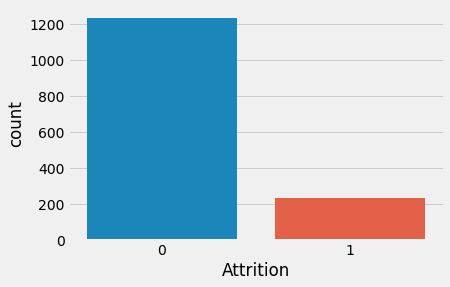

In [339]:
sns.countplot(x='Attrition', data=df)

In [340]:
# Drop the columns having same value in all the columns.
X_train = X_train.loc[:, X_train.nunique() > 1]
X_train.info()
X_test = X_test.loc[:, X_test.nunique() > 1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 685 to 1044
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1029 non-null   int64
 1   BusinessTravel            1029 non-null   int64
 2   DailyRate                 1029 non-null   int64
 3   Department                1029 non-null   int64
 4   DistanceFromHome          1029 non-null   int64
 5   Education                 1029 non-null   int64
 6   EducationField            1029 non-null   int64
 7   EmployeeNumber            1029 non-null   int64
 8   EnvironmentSatisfaction   1029 non-null   int64
 9   Gender                    1029 non-null   int64
 10  HourlyRate                1029 non-null   int64
 11  JobInvolvement            1029 non-null   int64
 12  JobLevel                  1029 non-null   int64
 13  JobRole                   1029 non-null   int64
 14  JobSatisfaction           1029 non-nul

In [341]:
# Get all unique values in a column.
print(y_train.unique())
print(X_train['BusinessTravel'].unique())
print(X_train['Department'].unique())
print(X_train['EducationField'].unique())
print(X_train['Gender'].unique())
print(X_train['OverTime'].unique())
print(X_train['MaritalStatus'].unique())
print(X_train['JobRole'].unique())

[0 1]
[2 1 0]
[0 2 1]
[1 0 4 3 2 5]
[1 0]
[1 0]
[0 2 1]
[0 5 3 1 8 2 4 6 7]


In [342]:
# Check the accuracy of Logistic Regression before doing any data cleaning

from sklearn.linear_model import LogisticRegression
logistic1 = LogisticRegression()
# logistic1.fit(df[df.columns[~df.columns.isin(['Attrition'])]], df[['Attrition']])
logistic1.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [343]:
# Print the confusion matrix.

from sklearn.metrics import confusion_matrix

# predict1 = logistic1.predict(df[df.columns[~df.columns.isin(['Attrition'])]])
predict1 = logistic1.predict(X_train)
predict1
cm1 = confusion_matrix(y_train, predict1)
print(cm1)

[[867   1]
 [160   1]]


In [344]:
# Check for Accuracy with all the features.

print("col sums", sum(cm1))
total1 = sum(sum(cm1))
print("Total", total1)
accuracy1 = (cm1[0,0] + cm1[1,1]) / total1
accuracy1

col sums [1027    2]
Total 1029


0.8435374149659864

In [345]:
# Check for multicollinearity. Calculate VIF values for each feature.
# 1. If vif < 5 Independence - then keep variable
# 2. If vif >= 5 Dependence - then drop variables (drop one by one, carefully)


import statsmodels.formula.api as sm

def vif_cal(input_data):
    #x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=input_data[xvar_names[i]] 
        x=input_data[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=input_data).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)
vif_cal(input_data=X_train)

Age  VIF =  2.13
BusinessTravel  VIF =  1.02
DailyRate  VIF =  1.04
Department  VIF =  1.35
DistanceFromHome  VIF =  1.02
Education  VIF =  1.08
EducationField  VIF =  1.03
EmployeeNumber  VIF =  1.03
EnvironmentSatisfaction  VIF =  1.03
Gender  VIF =  1.03
HourlyRate  VIF =  1.04
JobInvolvement  VIF =  1.03
JobLevel  VIF =  11.65
JobRole  VIF =  1.55
JobSatisfaction  VIF =  1.03
MaritalStatus  VIF =  1.8
MonthlyIncome  VIF =  11.69
MonthlyRate  VIF =  1.03
NumCompaniesWorked  VIF =  1.31
OverTime  VIF =  1.04
PercentSalaryHike  VIF =  2.66
PerformanceRating  VIF =  2.65
RelationshipSatisfaction  VIF =  1.03
StockOptionLevel  VIF =  1.78
TotalWorkingYears  VIF =  4.94
TrainingTimesLastYear  VIF =  1.03
WorkLifeBalance  VIF =  1.02
YearsAtCompany  VIF =  4.37
YearsInCurrentRole  VIF =  2.66
YearsSinceLastPromotion  VIF =  1.66
YearsWithCurrManager  VIF =  2.87


In [346]:
#Drop the variable with highest VIF
vif_cal(input_data=X_train.drop("JobLevel", axis=1))

Age  VIF =  2.13
BusinessTravel  VIF =  1.02
DailyRate  VIF =  1.04
Department  VIF =  1.33
DistanceFromHome  VIF =  1.02
Education  VIF =  1.08
EducationField  VIF =  1.03
EmployeeNumber  VIF =  1.03
EnvironmentSatisfaction  VIF =  1.03
Gender  VIF =  1.03
HourlyRate  VIF =  1.04
JobInvolvement  VIF =  1.03
JobRole  VIF =  1.54
JobSatisfaction  VIF =  1.03
MaritalStatus  VIF =  1.8
MonthlyIncome  VIF =  2.99
MonthlyRate  VIF =  1.02
NumCompaniesWorked  VIF =  1.31
OverTime  VIF =  1.04
PercentSalaryHike  VIF =  2.66
PerformanceRating  VIF =  2.65
RelationshipSatisfaction  VIF =  1.03
StockOptionLevel  VIF =  1.78
TotalWorkingYears  VIF =  4.81
TrainingTimesLastYear  VIF =  1.03
WorkLifeBalance  VIF =  1.02
YearsAtCompany  VIF =  4.37
YearsInCurrentRole  VIF =  2.66
YearsSinceLastPromotion  VIF =  1.66
YearsWithCurrManager  VIF =  2.87


In [347]:
# Individual Impact of Variables
import statsmodels.api as sm

# m1=sm.Logit(df['Attrition'], df[df.columns[~df.columns.isin(['Attrition'])]])
m1=sm.Logit(y_train, X_train)
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.315890
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315890
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                           30
Date:                Fri, 30 Dec 2022   Pseudo R-squ.:                  0.2717
Time:                        16:32:45   Log-Likelihood:                -325.05
converged:                       True   LL-Null:                       -446.34
Covariance Type:            nonrobust   LLR p-value:                 4.094e-35
                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

In [348]:
'''
P-Value for variable impact
1. If p < 0.05 Impactful - then keep variable
2. If p >= 0.05 Not Impactful - then drop variable
'''
X_train.drop(['Age', 'MonthlyIncome', 'JobLevel', 'HourlyRate', 'EmployeeNumber', 'Education', 'DailyRate', 'MonthlyRate',
        'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance'], axis=1, inplace=True)
X_test.drop(['Age', 'MonthlyIncome', 'JobLevel', 'HourlyRate', 'EmployeeNumber', 'Education', 'DailyRate', 'MonthlyRate',
        'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance'], axis=1, inplace=True)
m1=sm.Logit(y_train, X_train)
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.323555
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323555
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                          Logit   Df Residuals:                     1009
Method:                           MLE   Df Model:                           19
Date:                Fri, 30 Dec 2022   Pseudo R-squ.:                  0.2541
Time:                        16:32:45   Log-Likelihood:                -332.94
converged:                       True   LL-Null:                       -446.34
Covariance Type:            nonrobust   LLR p-value:                 1.489e-37
                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

In [349]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,5,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,1,23,2,1,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,1,613,1,6,1,1,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,1,4,3,0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,0,2,3,1,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [350]:
# Re-Check the accuracy of Logistic Regression.

from sklearn.linear_model import LogisticRegression
logistic1 = LogisticRegression()
logistic1.fit(X_train, y_train)

# Print the confusion matrix.

from sklearn.metrics import confusion_matrix

predict1 = logistic1.predict(X_train)
predict1
cm1 = confusion_matrix(y_train, predict1)
print(cm1)

# Check for Accuracy with all the features.

print("col sums", sum(cm1))
total1 = sum(sum(cm1))
print("Total", total1)
accuracy1 = (cm1[0,0] + cm1[1,1]) / total1
print(f'Final accuracy is {accuracy1}')

[[856  12]
 [113  48]]
col sums [969  60]
Total 1029
Final accuracy is 0.8785228377065112


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [351]:
X_test

,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
121,0,0,22,2,3,1,3,0,2,1,0,1,13,3,1,8,7,7,0,7
42,1,1,25,0,1,1,1,2,3,0,1,1,12,3,3,1,1,0,0,1
854,1,1,7,1,1,0,3,1,3,1,4,0,19,3,3,7,3,2,0,2
322,1,1,2,1,1,0,4,1,4,0,7,1,16,3,3,10,7,7,0,7
1149,1,1,19,5,4,1,2,2,1,2,1,1,11,3,1,7,7,7,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,1,1,1,0,4,1,3,1,4,1,3,1,22,4,1,12,5,3,1,0
414,1,0,1,3,1,0,3,6,2,0,1,0,16,3,2,6,5,3,1,4
76,1,0,1,2,3,1,2,0,1,0,0,1,14,3,2,16,15,13,2,8
1049,1,0,16,0,4,1,3,0,3,1,8,1,15,3,3,4,2,1,2,2


In [352]:
X_train

,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
685,2,0,1,1,3,1,2,0,1,0,1,1,12,3,2,7,7,7,0,7
1448,1,0,3,0,3,1,2,0,2,2,2,1,11,3,3,14,5,4,0,4
1401,1,2,26,4,3,1,4,5,2,1,4,0,18,3,1,35,10,9,1,4
1291,1,1,10,1,4,1,3,3,1,0,1,1,15,3,2,10,10,3,0,8
217,1,1,1,3,3,1,3,1,3,0,0,1,14,3,4,7,6,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1,1,28,3,4,0,2,7,2,0,1,1,11,3,3,21,21,6,8,6
658,1,1,9,0,2,1,3,1,1,1,1,0,13,3,4,8,8,7,7,1
578,2,1,2,0,1,0,4,3,1,0,6,0,12,3,4,17,15,7,4,12
391,1,1,2,1,2,0,2,2,3,1,6,1,22,4,2,20,1,0,0,0


In [353]:
# Check accuracy of the model over the test data

# Print the confusion matrix.
predict1 = logistic1.predict(X_test)
predict1
cm1 = confusion_matrix(y_test, predict1)
print(cm1)

# Check for Accuracy with all the features.

print("col sums", sum(cm1))
total1 = sum(sum(cm1))
print("Total", total1)
accuracy1 = (cm1[0,0] + cm1[1,1]) / total1
print(f'Final accuracy over the test data = {accuracy1}')

[[353  12]
 [ 46  30]]
col sums [399  42]
Total 441
Final accuracy over the test data = 0.8684807256235828
